# Sales Anlysis 

#### Importing the Nescessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### Loading the DataSets

In [2]:
import os

# inorder to load the 12 datasheets into one datasheet we will use for loops

cwd = os.getcwd()
path = './Sales_Data'

files = [file for file in os.listdir(path) if not file.startswith('.')]  #populates list files variable with file each file name that is not invisible in the path directory
df_final = pd.DataFrame()

for file in files:  
    temp_df = pd.read_csv(path+'/'+file)  # creating temporary df using path name and file name intuitively 
    df_final = pd.concat([df_final, temp_df])  # concating tempoary df to final df 

print('Shape After Joining Each csv file', df_final.shape)
df_final.head()
    

Shape After Joining Each csv file (186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Initial Analysis - Removing Duplicates and Missing Values EDA


In [3]:
# checking for NA's or nulls
df_final.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

We seem to be missing entire rows of data we can explore that

In [4]:
null_values = df_final[df_final.isna().any(axis=1)]
null_values.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


Our hypothesis is correct, there missing data all the way across the dataset, so we can get rid of it. (most likely due to blank rows when merging the data files)

In [5]:
df_final.dropna(axis=0, inplace=True)
print('Shape after dropping null values', df_final.shape)
print('We removed',null_values.shape[0], 'rows')
df_final.head()

Shape after dropping null values (186305, 6)
We removed 545 rows


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Checking and Dropping Identical Duplicates

In [6]:
#To look at duplicated rows we can either drip duplicates directly to view them and then drop them 
duplicated_df = df_final.duplicated(keep=False)
display(df_final[duplicated_df == True])

# Lets drop the duplicats and remove columns that got in our data when joining. 
df_final.drop_duplicates(inplace =True, keep='first')

OID_index = df_final[df_final['Order ID'] == 'Order ID'].index  # finding the index value of rows where Order ID = 'Order ID'
df_final.drop(OID_index, axis=0, inplace=True)
display(df_final[df_final.duplicated(keep=False)])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
11574,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11617,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
11618,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
11620,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


Looks We have removed all duplicated rows and duplicated header column. 

### Tidying Data - Feature Engineering

In [7]:
# tidying our data and making sure we have the right dtypes
display(df_final.dtypes)
df_final['Quantity Ordered'] = pd.to_numeric(df_final['Quantity Ordered'])
df_final['Price Each'] = pd.to_numeric(df_final['Price Each'])

df_final.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [8]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [21]:
# feature engineering new columns from what we have
# creating month year columns 

import datetime as dt
df_final['Order Date'] = pd.to_datetime(df_final['Order Date'])
df_final['Month'] = df_final['Order Date'].dt.month
df_final['Year'] = df_final['Order Date'].dt.year
df_final['Hour'] = df_final['Order Date'].dt.hour
df_final['str_month'] = df_final['Order Date'].dt.strftime('%b')
df_final['Day_of_wk'] = df_final['Order Date'].dt.strftime('%a')
df_final['Sales'] = df_final['Price Each'] * df_final['Quantity Ordered']

In [22]:
df_final.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State,Hour,Day_of_wk,str_month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas,TX,8,Fri,Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston,MA,22,Sun,Apr
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles,CA,14,Fri,Apr
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles,CA,14,Fri,Apr
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles,CA,9,Tue,Apr


In [23]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df_final['City'] = df_final['Purchase Address'].apply(lambda x: get_city(x))
df_final['State'] = df_final['Purchase Address'].apply(lambda x: get_state(x))
print(df_final.shape)
df_final.to_csv('finaldata.csv', index=False)
df_final.head()

(185675, 14)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State,Hour,Day_of_wk,str_month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas,TX,8,Fri,Apr
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston,MA,22,Sun,Apr
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles,CA,14,Fri,Apr
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles,CA,14,Fri,Apr
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles,CA,9,Tue,Apr


Now that we have our clean and organized data we can dig into and find some try to find some insights

## EDA and Creating Groups

In [112]:
# For this we can group our data using a function to later group by other values
def group_by(group, agg, value, df):
    temp = df.groupby([group]).agg(agg)[value].reset_index(name=agg)
    keys = [key for key, values in df_final.groupby([group])] 
    return keys, temp


### Question 1
#### What is the highest sales month?

The month with the most sales was 12.0 with $46.08280750001529 hundred thousand in total monthly sales


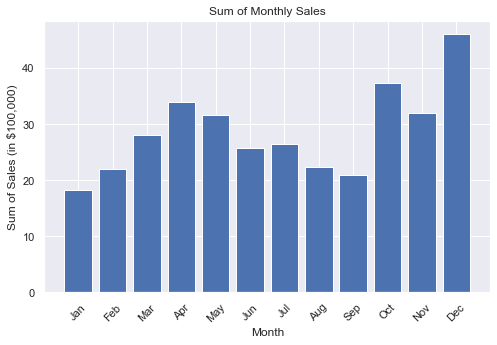

In [134]:
monthly_sales = group_by('Month', 'sum', 'Sales', df_final)  # using the function we created earlier
months = pd.date_range(start='1/2018', end='12/2018')  # creating datetime index over a year 
months = months.strftime('%b').unique() # creates month index taking the unique values for label in graph

fig, ax = plt.subplots(figsize =(8,5))
ax.bar(months, monthly_sales[1]['sum']/100000)
ax.set_title('Sum of Monthly Sales')
ax.set_xlabel('Month')
ax.set_xticklabels(labels=months, rotation=45)
ax.set_ylabel('Sum of Sales (in $100,000)')

print('The month with the most sales was {} with ${} hundred thousand in total monthly sales'.format(monthly_sales[1].max()[0], monthly_sales[1].max()[1]/100000))

### Question 2 -
##### What City/ State Sold the most product

The city with the most sales was Seattle with $82.54609620004004 hundred thousand in total sales
The State with the most sales was WA with $137.0288996000214 hundred thousand in total monthly sales


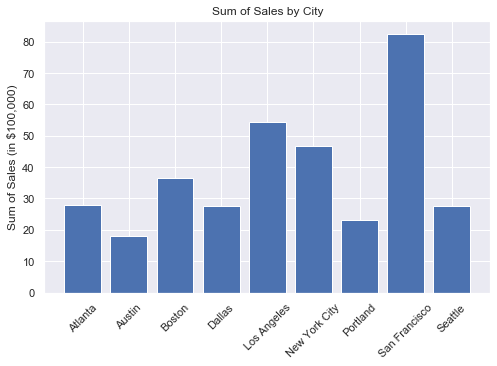

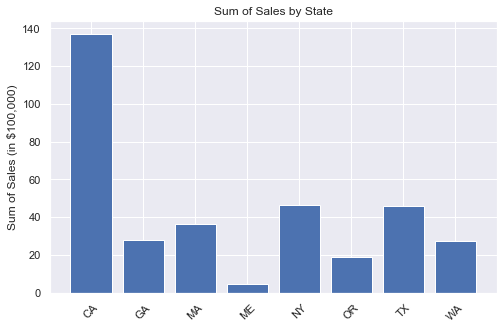

In [139]:
city_sales = group_by('City', 'sum', 'Sales', df_final)
state_sales = group_by('State', 'sum', 'Sales', df_final)

fig, ax = plt.subplots(figsize =(8,5))
ax.bar(city_sales[0], city_sales[1]['sum']/100000)
ax.set_title('Sum of Sales by City')
ax.set_xticklabels(labels =city_sales[0], rotation=45)
ax.set_ylabel('Sum of Sales (in $100,000)')
print('The city with the most sales was {} with ${} hundred thousand in total sales'.format(city_sales[1].max()[0], city_sales[1].max()[1]/100000))

fig, ax = plt.subplots(figsize =(8,5))
ax.bar(state_sales[0], state_sales[1]['sum']/100000)
ax.set_title('Sum of Sales by State')
ax.set_xticklabels(labels=state_sales[0], rotation=45)
ax.set_ylabel('Sum of Sales (in $100,000)')
print('The State with the most sales was {} with ${} hundred thousand in total monthly sales'.format(state_sales[1].max()[0], state_sales[1].max()[1]/100000))

In [63]:
sales_city

City
Atlanta        2.794195e+06
Austin         1.818029e+06
Boston         3.657928e+06
Dallas         2.765374e+06
Los Angeles    5.448280e+06
Name: Sales, dtype: float64